# Machine Learning with scikit-learn
[Jian Tao](https://coehpc.engr.tamu.edu/people/jian-tao/), Texas A&M University

Aug 3, 2019

Converted from the notebook

**Chapter 15: Machine learning**

Robert Johansson

Source code listings for [Numerical Python - Scientific Computing and Data Science Applications with Numpy, SciPy and Matplotlib](https://www.apress.com/us/book/9781484242452) (ISBN 978-1-484242-45-2).

In [98]:
from sklearn import datasets
from sklearn import model_selection
from sklearn import linear_model
from sklearn import metrics
from sklearn import tree
from sklearn import neighbors
from sklearn import svm
from sklearn import ensemble
from sklearn import cluster

In [99]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

# Built-in datasets

In [100]:
#Load and return the boston house-prices dataset (regression).
boston = datasets.load_boston()

In [91]:
#Load the California housing dataset (regression).
#datasets.fetch_california_housing;

In [5]:
#Generate a random regression problem.
#datasets.make_regression;

# Regression

In [6]:
np.random.seed(123)

In [7]:
X_all, y_all = datasets.make_regression(n_samples=50, n_features=50, n_informative=10) #, noise=2.5)

In [8]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(X_all, y_all, train_size=0.5)

In [9]:
X_train.shape, y_train.shape

((25, 50), (25,))

In [10]:
X_test.shape, y_test.shape

((25, 50), (25,))

In [11]:
model = linear_model.LinearRegression()

In [13]:
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [14]:
def sse(resid):
    return sum(resid**2)

In [15]:
resid_train = y_train - model.predict(X_train)
sse_train = sse(resid_train)
sse_train

1.3914023309596833e-24

In [16]:
resid_test = y_test - model.predict(X_test)
sse_test = sse(resid_train)
sse_test

1.3914023309596833e-24

In [17]:
model.score(X_train, y_train)

1.0

In [18]:
model.score(X_test, y_test)

0.3140740067520168

In [19]:
def plot_residuals_and_coeff(resid_train, resid_test, coeff):
    fig, axes = plt.subplots(1, 3, figsize=(12, 3))
    axes[0].bar(np.arange(len(resid_train)), resid_train)
    axes[0].set_xlabel("sample number")
    axes[0].set_ylabel("residual")
    axes[0].set_title("training data")
    axes[1].bar(np.arange(len(resid_test)), resid_test)
    axes[1].set_xlabel("sample number")
    axes[1].set_ylabel("residual")
    axes[1].set_title("testing data")
    axes[2].bar(np.arange(len(coeff)), coeff)
    axes[2].set_xlabel("coefficient number")
    axes[2].set_ylabel("coefficient")
    fig.tight_layout()
    return fig, axes

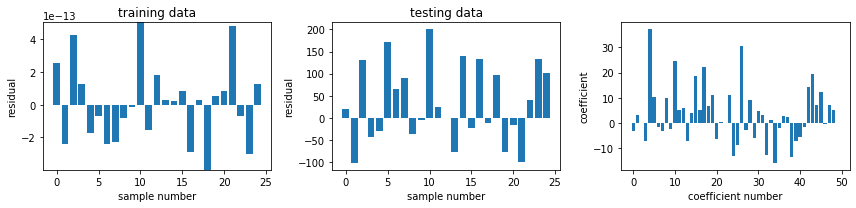

In [20]:
fig, ax = plot_residuals_and_coeff(resid_train, resid_test, model.coef_)
#fig.savefig("regression-ols.pdf")

In [102]:
model = linear_model.Ridge() #alpha=2.5)

In [22]:
model.fit(X_train, y_train)

Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [23]:
resid_train = y_train - model.predict(X_train)
sse_train = sum(resid_train**2)
sse_train

178.5069516495107

In [24]:
resid_test = y_test - model.predict(X_test)
sse_test = sum(resid_test**2)
sse_test

212737.00160105838

In [25]:
model.score(X_train, y_train), model.score(X_test, y_test)

(0.9994595515017335, 0.31670332736075457)

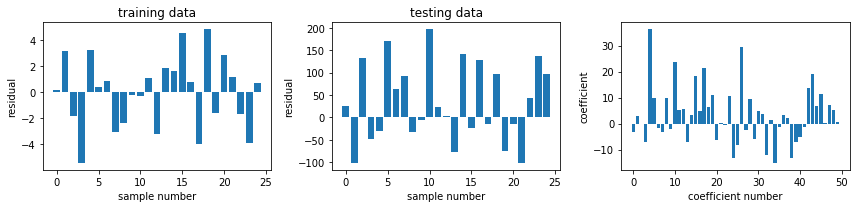

In [26]:
fig, ax = plot_residuals_and_coeff(resid_train, resid_test, model.coef_)
fig.savefig("regression-ridge.pdf")

In [27]:
model = linear_model.Lasso(alpha=1.0)

In [28]:
model.fit(X_train, y_train)

Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [29]:
resid_train = y_train - model.predict(X_train)
sse_train = sse(resid_train)
sse_train

309.7497138953237

In [30]:
resid_test = y_test - model.predict(X_test)
sse_test = sse(resid_test)
sse_test

1489.1176065002487

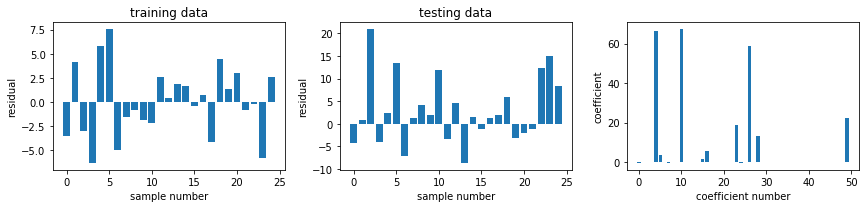

In [31]:
fig, ax = plot_residuals_and_coeff(resid_train, resid_test, model.coef_)
fig.savefig("regression-lasso.pdf")

In [32]:
alphas = np.logspace(-4, 2, 100)

In [33]:
coeffs = np.zeros((len(alphas), X_train.shape[1]))
sse_train = np.zeros_like(alphas)
sse_test = np.zeros_like(alphas)

for n, alpha in enumerate(alphas):
    model = linear_model.Lasso(alpha=alpha)
    model.fit(X_train, y_train)
    coeffs[n, :] = model.coef_
    resid = y_train - model.predict(X_train)
    sse_train[n] = sum(resid**2)
    resid = y_test - model.predict(X_test)
    sse_test[n] = sum(resid**2)

/opt/rh/rh-python36/root/usr/lib64/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 33.114750673447624, tolerance: 33.029410243912
  positive)
/opt/rh/rh-python36/root/usr/lib64/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 36.82233955030611, tolerance: 33.029410243912
  positive)
/opt/rh/rh-python36/root/usr/lib64/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 42.2044610999735, tolerance: 33.029410243912
  positive)
/opt/rh/rh-python36/root/usr/lib64/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You migh

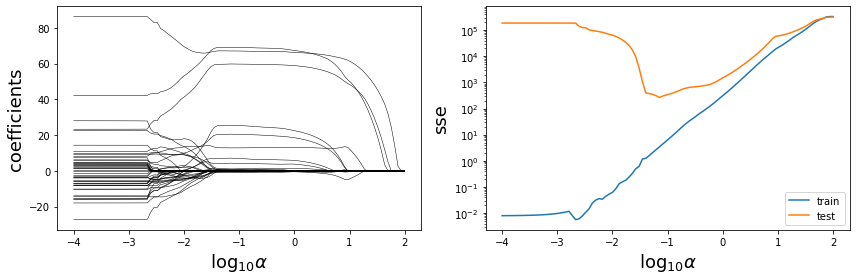

In [34]:
fig, axes = plt.subplots(1, 2, figsize=(12, 4), sharex=True)

for n in range(coeffs.shape[1]):
    axes[0].plot(np.log10(alphas), coeffs[:, n], color='k', lw=0.5)

axes[1].semilogy(np.log10(alphas), sse_train, label="train")
axes[1].semilogy(np.log10(alphas), sse_test, label="test")
axes[1].legend(loc=0)

axes[0].set_xlabel(r"${\log_{10}}\alpha$", fontsize=18)
axes[0].set_ylabel(r"coefficients", fontsize=18)
axes[1].set_xlabel(r"${\log_{10}}\alpha$", fontsize=18)
axes[1].set_ylabel(r"sse", fontsize=18)
fig.tight_layout()
fig.savefig("ch15-regression-lasso-vs-alpha.pdf")

In [35]:
model = linear_model.LassoCV()

In [36]:
model.fit(X_all, y_all)

/opt/rh/rh-python36/root/usr/lib64/python3.6/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


LassoCV(alphas=None, copy_X=True, cv='warn', eps=0.001, fit_intercept=True,
        max_iter=1000, n_alphas=100, n_jobs=None, normalize=False,
        positive=False, precompute='auto', random_state=None,
        selection='cyclic', tol=0.0001, verbose=False)

In [37]:
model.alpha_

0.06559238747534718

In [38]:
resid_train = y_train - model.predict(X_train)
sse_train = sse(resid_train)
sse_train

1.5450589323149022

In [39]:
resid_test = y_test - model.predict(X_test)
sse_test = sse(resid_test)
sse_test

1.5321417406217528

In [40]:
model.score(X_train, y_train), model.score(X_test, y_test)

(0.9999953221722068, 0.9999950788657098)

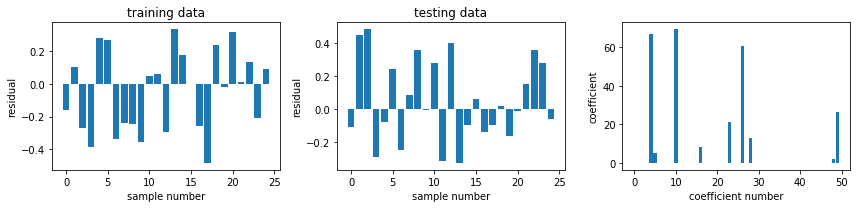

In [41]:
fig, ax = plot_residuals_and_coeff(resid_train, resid_test, model.coef_)
fig.savefig("ch15-regression-lasso-cv.pdf")

In [42]:
model = linear_model.ElasticNetCV()

In [43]:
model.fit(X_all, y_all)

/opt/rh/rh-python36/root/usr/lib64/python3.6/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


ElasticNetCV(alphas=None, copy_X=True, cv='warn', eps=0.001, fit_intercept=True,
             l1_ratio=0.5, max_iter=1000, n_alphas=100, n_jobs=None,
             normalize=False, positive=False, precompute='auto',
             random_state=None, selection='cyclic', tol=0.0001, verbose=0)

In [44]:
model.alpha_

0.13118477495069433

In [45]:
model.l1_ratio

0.5

In [46]:
resid_train = y_train - model.predict(X_train)
sse_train = sum(resid_train**2)
sse_train

2183.83917293912

In [47]:
resid_test = y_test - model.predict(X_test)
sse_test = sum(resid_test**2)
sse_test

2650.0504463382463

In [48]:
model.score(X_train, y_train), model.score(X_test, y_test)

(0.9933881981034111, 0.9914882195448783)

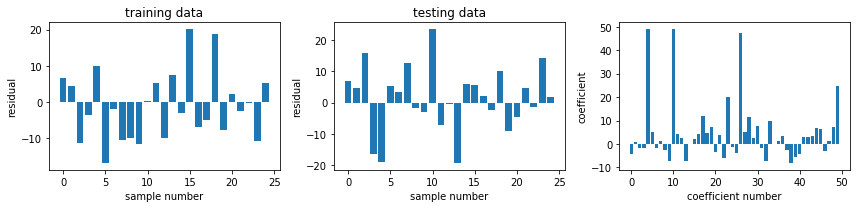

In [49]:
fig, ax = plot_residuals_and_coeff(resid_train, resid_test, model.coef_)
fig.savefig("ch15-regression-elastic-net-cv.pdf")

# Classification

In [50]:
iris = datasets.load_iris()

In [51]:
type(iris)

sklearn.utils.Bunch

In [52]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [53]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [54]:
iris.data.shape

(150, 4)

In [55]:
iris.target.shape

(150,)

In [56]:
# print(iris['DESCR'])

In [57]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(iris.data, iris.target, train_size=0.7)

In [58]:
classifier = linear_model.LogisticRegression()

In [59]:
classifier.fit(X_train, y_train)

/opt/rh/rh-python36/root/usr/lib64/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/rh/rh-python36/root/usr/lib64/python3.6/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [60]:
y_test_pred = classifier.predict(X_test)

In [61]:
print(metrics.classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       1.00      0.76      0.87        17
           2       0.75      1.00      0.86        12

    accuracy                           0.91        45
   macro avg       0.92      0.92      0.91        45
weighted avg       0.93      0.91      0.91        45



In [62]:
np.bincount(y_test)

array([16, 17, 12])

In [63]:
metrics.confusion_matrix(y_test, y_test_pred)

array([[16,  0,  0],
       [ 0, 13,  4],
       [ 0,  0, 12]])

In [64]:
classifier = tree.DecisionTreeClassifier()
classifier.fit(X_train, y_train)
y_test_pred = classifier.predict(X_test)
metrics.confusion_matrix(y_test, y_test_pred)

array([[16,  0,  0],
       [ 0, 12,  5],
       [ 0,  0, 12]])

In [65]:
classifier = neighbors.KNeighborsClassifier()
classifier.fit(X_train, y_train)
y_test_pred = classifier.predict(X_test)
metrics.confusion_matrix(y_test, y_test_pred)

array([[16,  0,  0],
       [ 0, 15,  2],
       [ 0,  0, 12]])

In [66]:
classifier = svm.SVC()
classifier.fit(X_train, y_train)
y_test_pred = classifier.predict(X_test)
metrics.confusion_matrix(y_test, y_test_pred)

/opt/rh/rh-python36/root/usr/lib64/python3.6/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


array([[16,  0,  0],
       [ 0, 15,  2],
       [ 0,  0, 12]])

In [67]:
classifier = ensemble.RandomForestClassifier()
classifier.fit(X_train, y_train)
y_test_pred = classifier.predict(X_test)
metrics.confusion_matrix(y_test, y_test_pred)

/opt/rh/rh-python36/root/usr/lib64/python3.6/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


array([[16,  0,  0],
       [ 0, 16,  1],
       [ 0,  0, 12]])

In [68]:
train_size_vec = np.linspace(0.1, 0.9, 30)

In [69]:
classifiers = [tree.DecisionTreeClassifier,
               neighbors.KNeighborsClassifier,
               svm.SVC,
               ensemble.RandomForestClassifier
              ]

In [70]:
cm_diags = np.zeros((3, len(train_size_vec), len(classifiers)), dtype=float)

In [71]:
for n, train_size in enumerate(train_size_vec):
    X_train, X_test, y_train, y_test = \
        model_selection.train_test_split(iris.data, iris.target, train_size=train_size)

    for m, Classifier in enumerate(classifiers): 
        classifier = Classifier()
        classifier.fit(X_train, y_train)
        y_test_pred = classifier.predict(X_test)
        cm_diags[:, n, m] = metrics.confusion_matrix(y_test, y_test_pred).diagonal()
        cm_diags[:, n, m] /= np.bincount(y_test)

/opt/rh/rh-python36/root/usr/lib64/python3.6/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/opt/rh/rh-python36/root/usr/lib64/python3.6/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/opt/rh/rh-python36/root/usr/lib64/python3.6/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/opt/rh/rh-python36/root/usr/lib64/python3.6/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: T

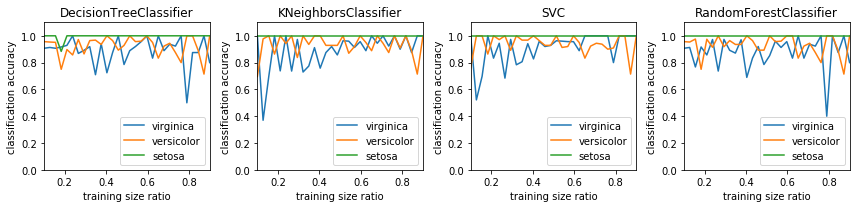

In [72]:
fig, axes = plt.subplots(1, len(classifiers), figsize=(12, 3))

for m, Classifier in enumerate(classifiers): 
    axes[m].plot(train_size_vec, cm_diags[2, :, m], label=iris.target_names[2])
    axes[m].plot(train_size_vec, cm_diags[1, :, m], label=iris.target_names[1])
    axes[m].plot(train_size_vec, cm_diags[0, :, m], label=iris.target_names[0])
    axes[m].set_title(type(Classifier()).__name__)
    axes[m].set_ylim(0, 1.1)
    axes[m].set_xlim(0.1, 0.9)
    axes[m].set_ylabel("classification accuracy")
    axes[m].set_xlabel("training size ratio")
    axes[m].legend(loc=4)

fig.tight_layout()
fig.savefig("ch15-classification-comparison.pdf")

# Clustering

In [73]:
X, y = iris.data, iris.target

In [74]:
np.random.seed(123)

In [75]:
n_clusters = 3

In [76]:
c = cluster.KMeans(n_clusters=n_clusters)

In [77]:
c.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [78]:
y_pred = c.predict(X)

In [79]:
y_pred[::8]

array([1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0],
      dtype=int32)

In [80]:
y[::8]

array([0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2])

In [81]:
idx_0, idx_1, idx_2 = (np.where(y_pred == n) for n in range(3))

In [82]:
y_pred[idx_0], y_pred[idx_1], y_pred[idx_2] = 2, 0, 1

In [83]:
y_pred[::8]

array([0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2],
      dtype=int32)

In [84]:
metrics.confusion_matrix(y, y_pred)

array([[50,  0,  0],
       [ 0, 48,  2],
       [ 0, 14, 36]])

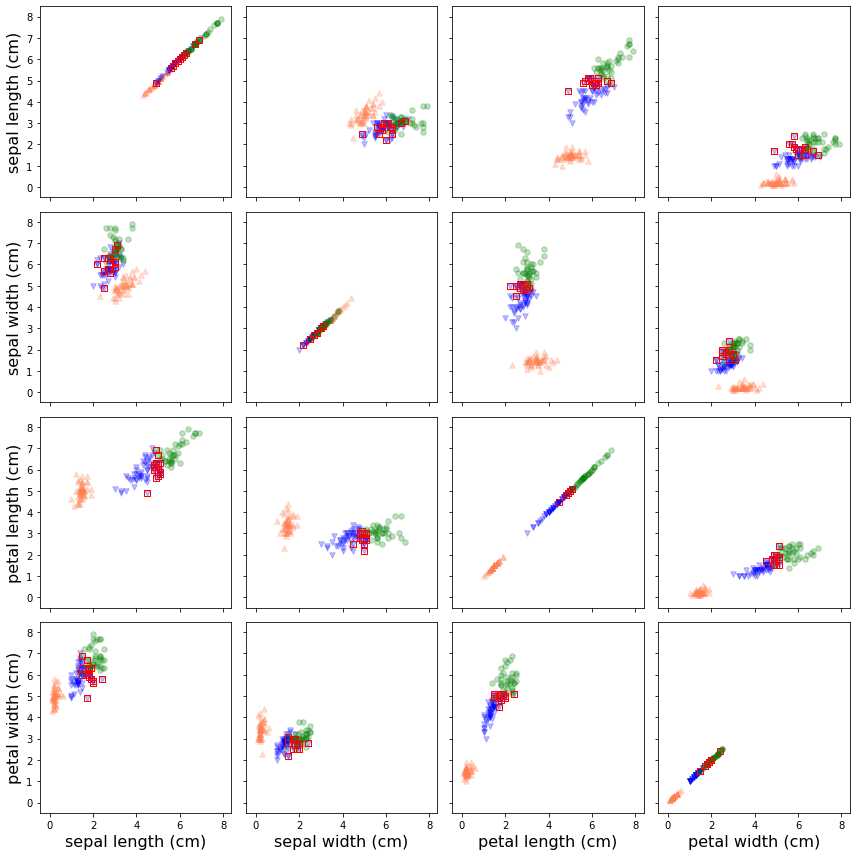

In [85]:
N = X.shape[1]

fig, axes = plt.subplots(N, N, figsize=(12, 12), sharex=True, sharey=True)

colors = ["coral", "blue", "green"]
markers = ["^", "v", "o"]
for m in range(N):
    for n in range(N):
        for p in range(n_clusters):
            mask = y_pred == p
            axes[m, n].scatter(X[:, m][mask], X[:, n][mask],
                               marker=markers[p], s=30, 
                               color=colors[p], alpha=0.25)

        for idx in np.where(y != y_pred):
            axes[m, n].scatter(X[idx, m], X[idx, n],
                               marker="s", s=30, 
                               edgecolor="red", 
                               facecolor=(1,1,1,0))
            
            
    axes[N-1, m].set_xlabel(iris.feature_names[m], fontsize=16)
    axes[m, 0].set_ylabel(iris.feature_names[m], fontsize=16)
fig.tight_layout()
fig.savefig("ch15-clustering.pdf")

# Versions

In [86]:
%reload_ext watermark
%watermark -a 'Jian Tao' -nmv --packages sklearn,numpy,matplotlib,seaborn

Jian Tao Tue Aug 20 2019 

CPython 3.6.3
IPython 7.7.0

sklearn 0.21.3
numpy 1.17.0
matplotlib 3.1.1
seaborn 0.9.0

compiler   : GCC 4.8.5 20150623 (Red Hat 4.8.5-36)
system     : Linux
release    : 3.10.0-957.27.2.el7.x86_64
machine    : x86_64
processor  : x86_64
CPU cores  : 64
interpreter: 64bit
